In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.icm_framework_v2 import ICMFrameworkV2
from utils.reliability_visualizer import ReliabilityVisualizer

###########################################################
# Load Classifier and Data
###########################################################
pipeline = joblib.load('lr_pipeline_classifier.pkl')
training_data = pd.read_excel("dataset/data_train.xlsx")

y_train = training_data['Morte']
X_train = training_data.drop(columns=['Morte'])

X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)

In [2]:
###########################################################
# Initialize ICM (Interpretable Confidence Measures)
###########################################################
##################3 
### Adjust
k_neighbors = 9  # Number of nearest neighbors
icm = ICMFrameworkV2(X_train_preprocessed, y_train.values, k_neighbors=k_neighbors)

In [3]:
###########################################################
# Classification and Reliability
###########################################################
def classify_and_calculate_reliability_icm(new_data, pipeline, icm):
    """
    Predicts the class and calculates a reliability score for a new instance using ICM Framework.

    Parameters:
    - new_data (pd.DataFrame): DataFrame with the same columns as training data.
    - pipeline (Pipeline): The loaded pipeline for preprocessing and classification.
    - icm (ICMFramework): Instance of the ICMFramework initialized with training data and labels.

    Returns:
    - dict: Contains prediction, reliability score, and neighbors used.
    """
    # Preprocess the data
    new_data_preprocessed = pipeline.named_steps['preprocessor'].transform(new_data)
    
    # Predict the label
    predicted_label = pipeline.named_steps['classifier'].predict(new_data_preprocessed)[0]
    
    # Compute the reliability score
    reliability_score = icm.compute_confidence(new_data_preprocessed[0], predicted_label)
    
    return {
        "predicted_label": predicted_label,
        "reliability_score": reliability_score
    }

In [4]:
###########################################################
# Load and Test with Unseen Data
###########################################################
validation_data = pd.read_excel("dataset/data_validation.xlsx")
# first_500_instances = validation_data.iloc[:500]

results = []
# for _, instance in first_500_instances.iterrows():
for _, instance in validation_data.iterrows():
    true_label = instance['Morte']
    instance_df = pd.DataFrame([instance.drop(labels=['Morte'])])
    result = classify_and_calculate_reliability_icm(
        instance_df,
        pipeline,
        icm
    )
    result['true_label'] = true_label
    results.append(result)

results_df = pd.DataFrame(results)
# results_df

Sigma:
0.04495805621033169
Sigma:
0.03089367112681589
Sigma:
0.14152579419421035
Sigma:
0.004487906273471889
Sigma:
0.006297102656955596
Sigma:
0.0016233983320632585
Sigma:
0.026950181802945047
Sigma:
0.0033583575430897322
Sigma:
0.012713677739860655
Sigma:
0.005327966858015421
Sigma:
0.0027119204941623235
Sigma:
0.01357139076146758
Sigma:
0.015975066941023304
Sigma:
0.0033562588905192963
Sigma:
0.005012742179165687
Sigma:
0.22409699123223825
Sigma:
0.007345035931619918
Sigma:
0.009941338644594535
Sigma:
0.05006918082892136
Sigma:
0.0031257544003723335
Sigma:
0.019559048501770007
Sigma:
0.009528322526462926
Sigma:
0.003021349823477872
Sigma:
0.0026173390508618033
Sigma:
0.007330294930214302
Sigma:
0.0034709536153318
Sigma:
0.002263084218524625
Sigma:
0.11014315891852394
Sigma:
0.007088076895124354
Sigma:
0.11703327580351806
Sigma:
0.002378073502635841
Sigma:
0.003154590081252517
Sigma:
0.002814483288128809
Sigma:
0.02135150283372738
Sigma:
0.03819030775343355
Sigma:
0.00288107983189275

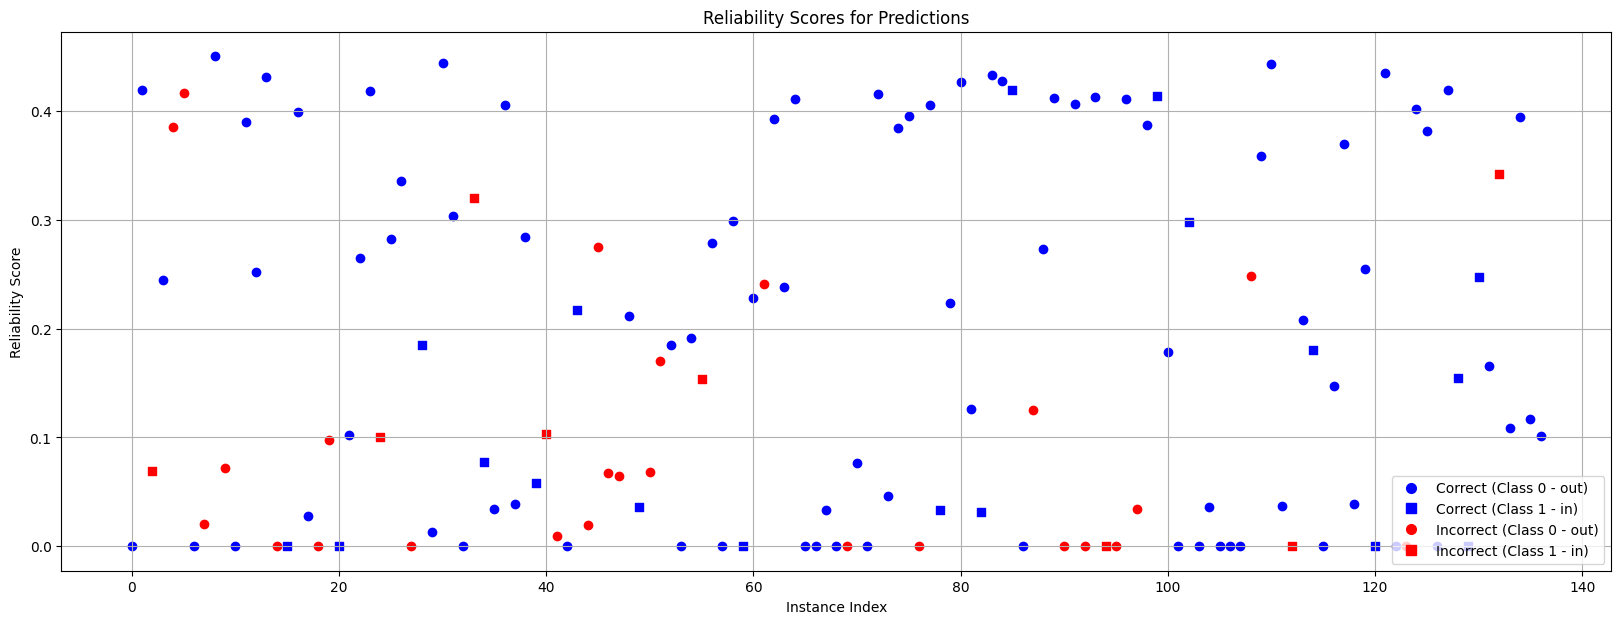

In [5]:
###########################################################
# Results
###########################################################
visualizer = ReliabilityVisualizer(results_df=results_df)

visualizer.plot_reliability_scores((20,7))

In [6]:
reliability_table_df = visualizer.get_reliability_table_5()
print(reliability_table_df)

     Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0   [0.00, 0.05]           29             13            8              2
1   ]0.05, 0.10]            1              5            2              1
2   ]0.10, 0.15]            6              1            0              2
3   ]0.15, 0.20]            4              1            3              1
4   ]0.20, 0.25]            6              2            2              0
5   ]0.25, 0.30]            8              1            1              0
6   ]0.30, 0.35]            2              0            0              2
7   ]0.35, 0.40]           10              1            0              0
8   ]0.40, 0.45]           19              1            2              0
9   ]0.45, 0.50]            1              0            0              0
10  ]0.50, 0.55]            0              0            0              0
11  ]0.55, 0.60]            0              0            0              0
12  ]0.60, 0.65]            0              0       

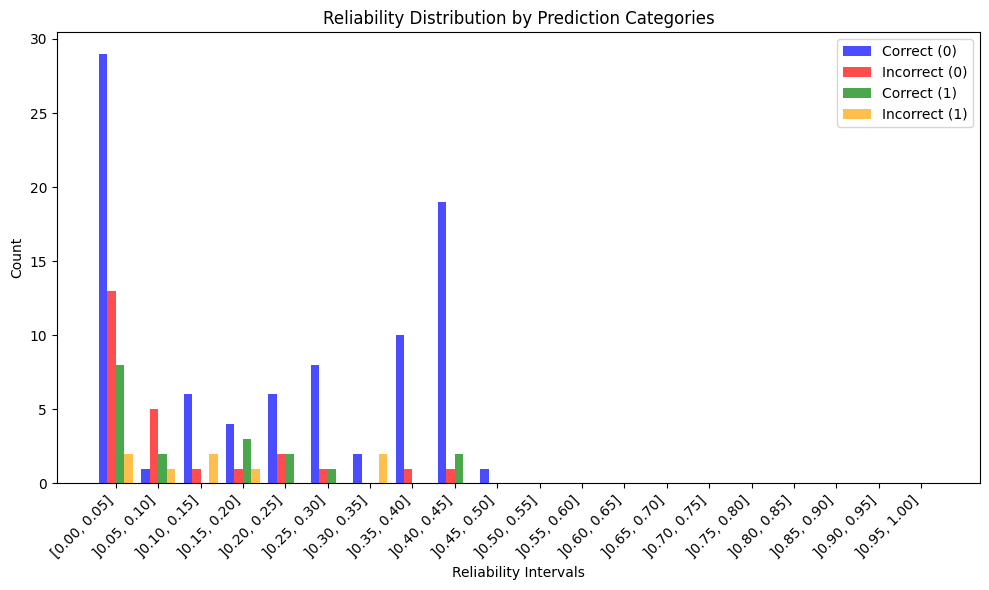

In [7]:
visualizer.plot_table_graph(reliability_table_df)

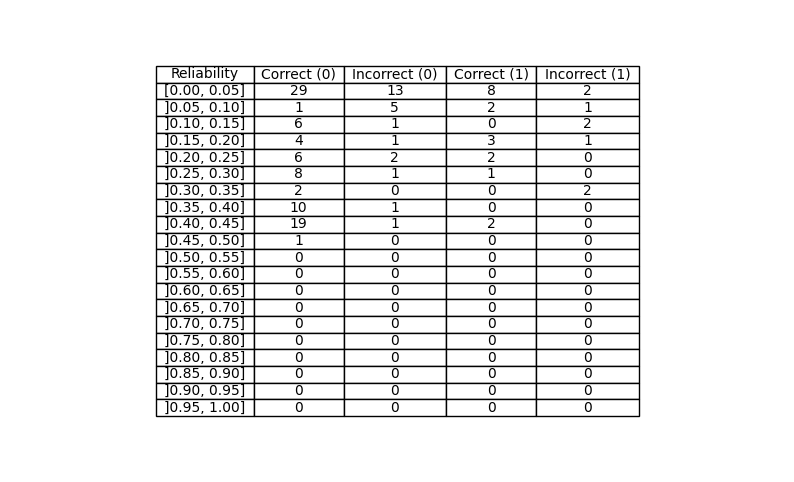

In [8]:
visualizer.plot_table_image(reliability_table_df)

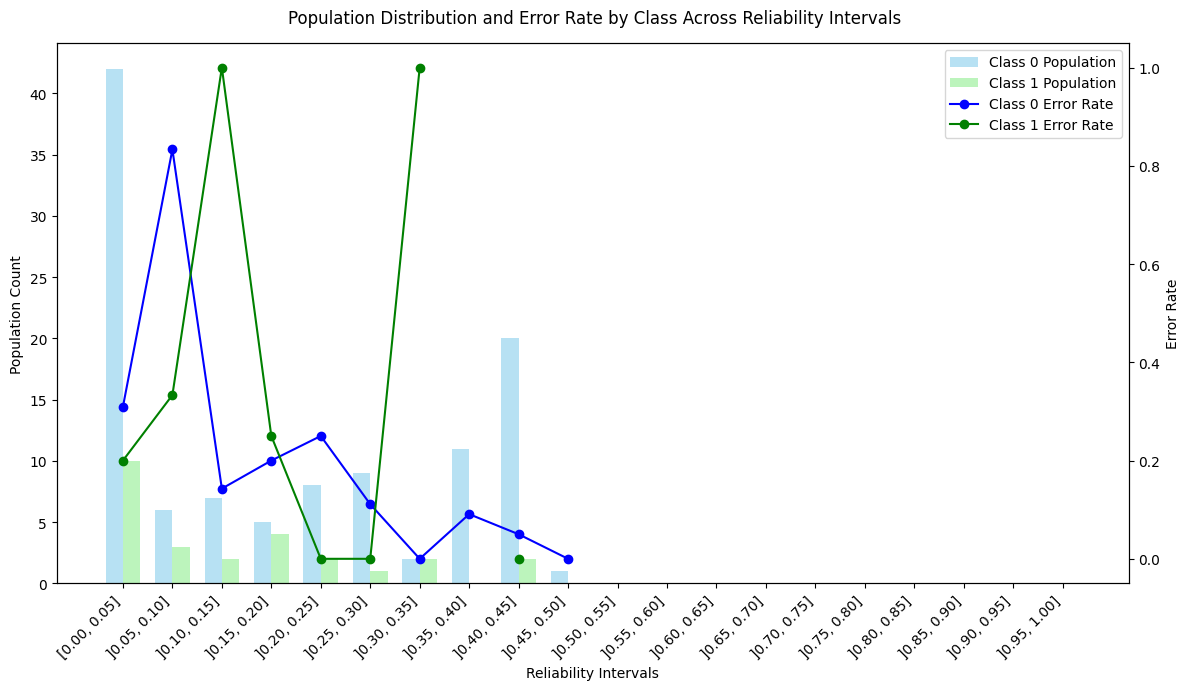

In [9]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_df)

### 10

In [10]:
reliability_table_10_df = visualizer.get_reliability_table_10()
print(reliability_table_10_df)

    Reliability  Correct (0)  Incorrect (0)  Correct (1)  Incorrect (1)
0  [0.00, 0.10]           30             18           10              3
1  ]0.10, 0.20]           10              2            3              3
2  ]0.20, 0.30]           14              3            3              0
3  ]0.30, 0.40]           12              1            0              2
4  ]0.40, 0.50]           20              1            2              0
5  ]0.50, 0.60]            0              0            0              0
6  ]0.60, 0.70]            0              0            0              0
7  ]0.70, 0.80]            0              0            0              0
8  ]0.80, 0.90]            0              0            0              0
9  ]0.90, 1.00]            0              0            0              0


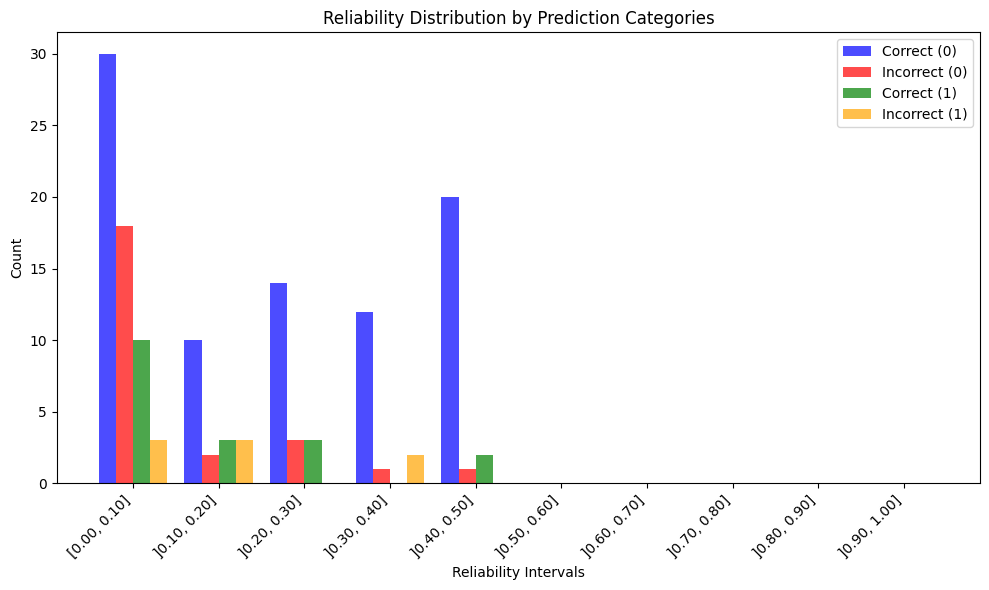

In [11]:
visualizer.plot_table_graph(reliability_table_10_df)

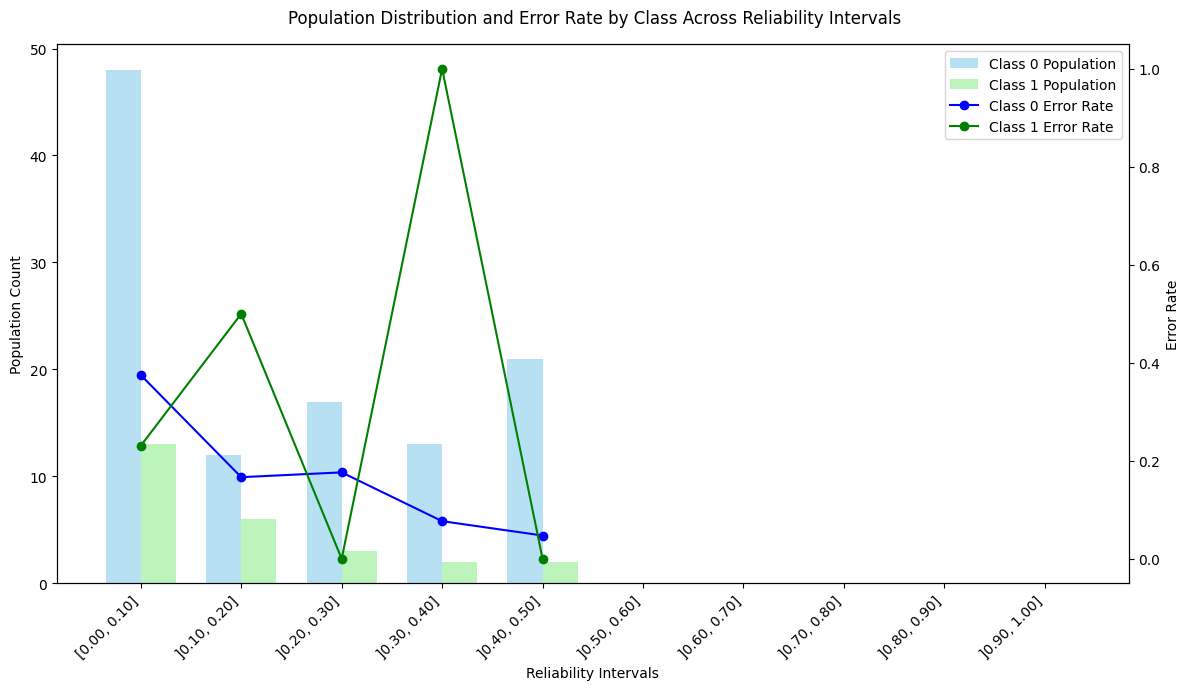

In [12]:
visualizer.plot_population_and_error_rate_by_class(reliability_table_10_df)

Sample reliability interval assignment:
   reliability_score reliability_interval
0           0.000000        (-0.001, 0.1]
1           0.419632           (0.4, 0.5]
2           0.069402        (-0.001, 0.1]
3           0.244495           (0.2, 0.3]
4           0.385451           (0.3, 0.4]
5           0.416751           (0.4, 0.5]
6           0.000000        (-0.001, 0.1]
7           0.020093        (-0.001, 0.1]
8           0.450383           (0.4, 0.5]
9           0.072195        (-0.001, 0.1]


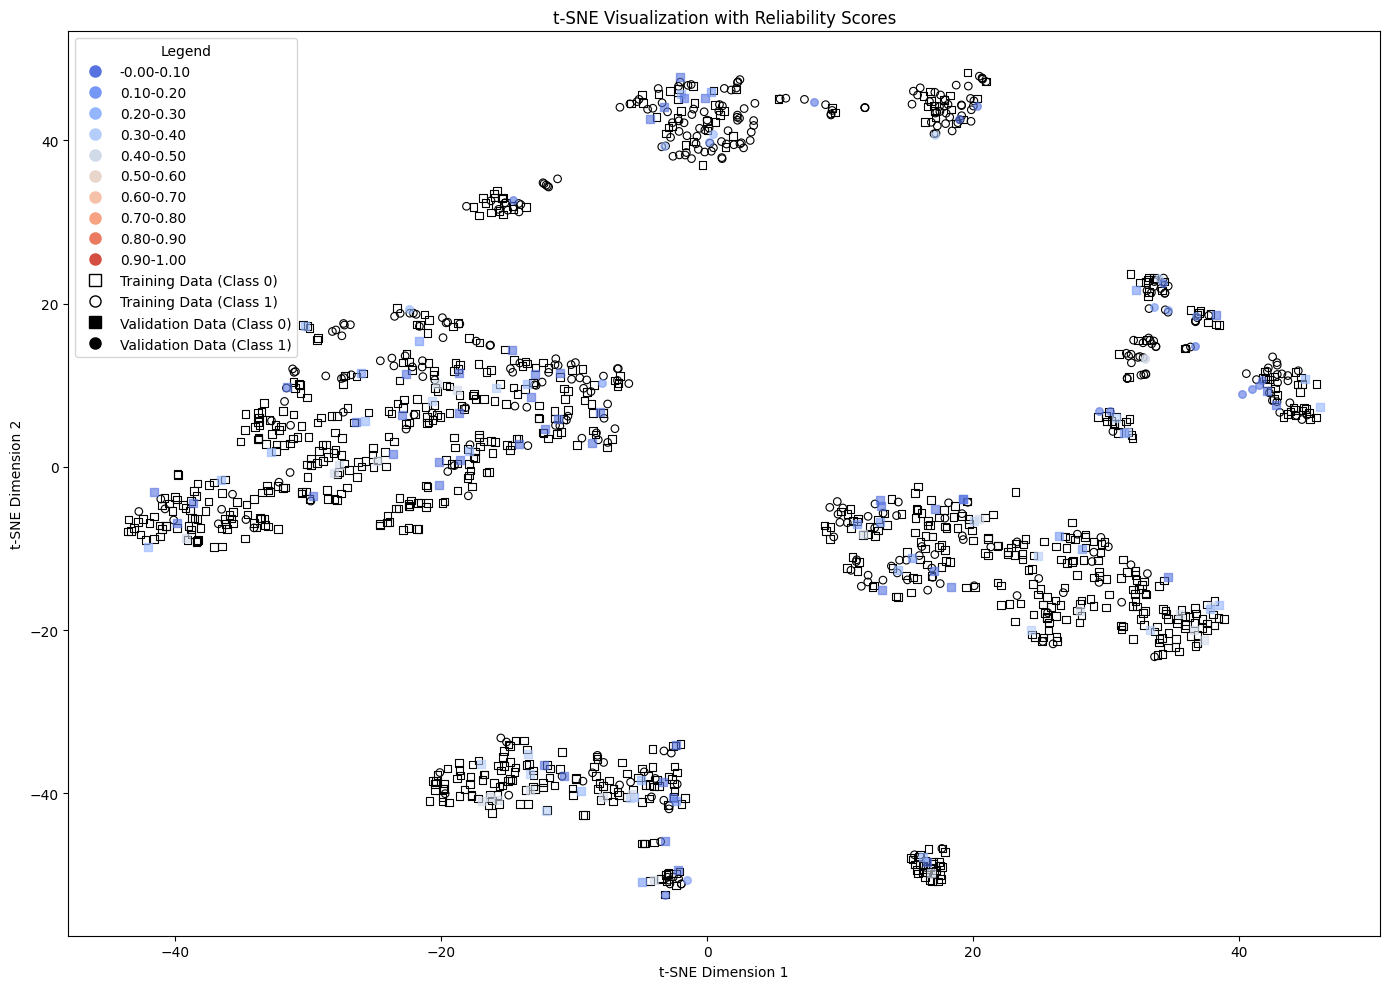

In [13]:
visualizer.plot_tsne_with_reliability(
    X_train_preprocessed, validation_data, y_train, pipeline
)